In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules



import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("D:\\ExcelR Data Science\\Assignments\\Assciation Rules\\book.csv")
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


###  Find frequently occurring itemsets using Aprior Algo

In [4]:

frq_items_ap = apriori(df, min_support = 0.05, use_colnames = True)
print(frq_items_ap)
  

    support                                          itemsets
0    0.4230                                        (ChildBks)
1    0.2475                                        (YouthBks)
2    0.4310                                         (CookBks)
3    0.2820                                        (DoItYBks)
4    0.2145                                          (RefBks)
..      ...                                               ...
95   0.0600            (YouthBks, GeogBks, CookBks, DoItYBks)
96   0.0560              (GeogBks, YouthBks, ArtBks, CookBks)
97   0.0650              (ArtBks, GeogBks, CookBks, DoItYBks)
98   0.0510  (ChildBks, DoItYBks, GeogBks, CookBks, YouthBks)
99   0.0535    (ChildBks, DoItYBks, ArtBks, GeogBks, CookBks)

[100 rows x 2 columns]


In [5]:
# Collecting the inferred rules in a dataframe
A_rules = association_rules(frq_items_ap, metric ="lift", min_threshold = 0.5)
A_rules = A_rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(A_rules.head())

              antecedents consequents  antecedent support  consequent support  \
35             (ItalCook)   (CookBks)              0.1135               0.431   
109  (ChildBks, ItalCook)   (CookBks)              0.0850               0.431   
181  (YouthBks, ItalCook)   (CookBks)              0.0590               0.431   
236  (ItalCook, DoItYBks)   (CookBks)              0.0585               0.431   
259    (ArtBks, ItalCook)   (CookBks)              0.0565               0.431   

     support  confidence      lift  leverage  conviction  zhangs_metric  
35    0.1135         1.0  2.320186  0.064582         inf       0.641850  
109   0.0850         1.0  2.320186  0.048365         inf       0.621858  
181   0.0590         1.0  2.320186  0.033571         inf       0.604676  
236   0.0585         1.0  2.320186  0.033287         inf       0.604355  
259   0.0565         1.0  2.320186  0.032148         inf       0.603074  


In [6]:
A_rules.shape

(662, 10)

### Find frequently occurring itemsets using F-P Growth

In [7]:
from mlxtend.frequent_patterns import fpgrowth
frq_items_fp = fpgrowth(df, min_support = 0.05, use_colnames = True)
print(frq_items_fp)
  

    support                                itemsets
0    0.2820                              (DoItYBks)
1    0.2760                               (GeogBks)
2    0.2475                              (YouthBks)
3    0.4230                              (ChildBks)
4    0.4310                               (CookBks)
..      ...                                     ...
95   0.0525           (GeogBks, ChildBks, ItalCook)
96   0.0525  (GeogBks, ChildBks, CookBks, ItalCook)
97   0.0585           (CookBks, ItalCook, DoItYBks)
98   0.0565             (ArtBks, CookBks, ItalCook)
99   0.0590           (YouthBks, CookBks, ItalCook)

[100 rows x 2 columns]


In [8]:
F_rules = association_rules(frq_items_fp, metric ="lift", min_threshold = 0.5)
F_rules = F_rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(F_rules.head())

                       antecedents consequents  antecedent support  \
601                     (ItalCook)   (CookBks)              0.1135   
613           (ChildBks, ItalCook)   (CookBks)              0.0850   
619            (GeogBks, ItalCook)   (CookBks)              0.0640   
631  (GeogBks, ChildBks, ItalCook)   (CookBks)              0.0525   
646           (ItalCook, DoItYBks)   (CookBks)              0.0585   

     consequent support  support  confidence      lift  leverage  conviction  \
601               0.431   0.1135         1.0  2.320186  0.064582         inf   
613               0.431   0.0850         1.0  2.320186  0.048365         inf   
619               0.431   0.0640         1.0  2.320186  0.036416         inf   
631               0.431   0.0525         1.0  2.320186  0.029872         inf   
646               0.431   0.0585         1.0  2.320186  0.033287         inf   

     zhangs_metric  
601       0.641850  
613       0.621858  
619       0.607906  
631       0.60

In [9]:
print("Assocition rules with Aprior\n")
print(A_rules.head(3))
print("\n\n")
print("Assocition rules with FP_Growth")
print(F_rules.head(3))



Assocition rules with Aprior

              antecedents consequents  antecedent support  consequent support  \
35             (ItalCook)   (CookBks)              0.1135               0.431   
109  (ChildBks, ItalCook)   (CookBks)              0.0850               0.431   
181  (YouthBks, ItalCook)   (CookBks)              0.0590               0.431   

     support  confidence      lift  leverage  conviction  zhangs_metric  
35    0.1135         1.0  2.320186  0.064582         inf       0.641850  
109   0.0850         1.0  2.320186  0.048365         inf       0.621858  
181   0.0590         1.0  2.320186  0.033571         inf       0.604676  



Assocition rules with FP_Growth
              antecedents consequents  antecedent support  consequent support  \
601            (ItalCook)   (CookBks)              0.1135               0.431   
613  (ChildBks, ItalCook)   (CookBks)              0.0850               0.431   
619   (GeogBks, ItalCook)   (CookBks)              0.0640              

#### From the two above we see that both algorithms found identical association rules with same coefficients, just presented in a different order.

### Visualizing Results association Rules with Aprior Algorithm
     Scatter Plot
     Bar Chart
     Heatmap
     ParallelCo Ordinates
     WordCloud
     Network Graph
     

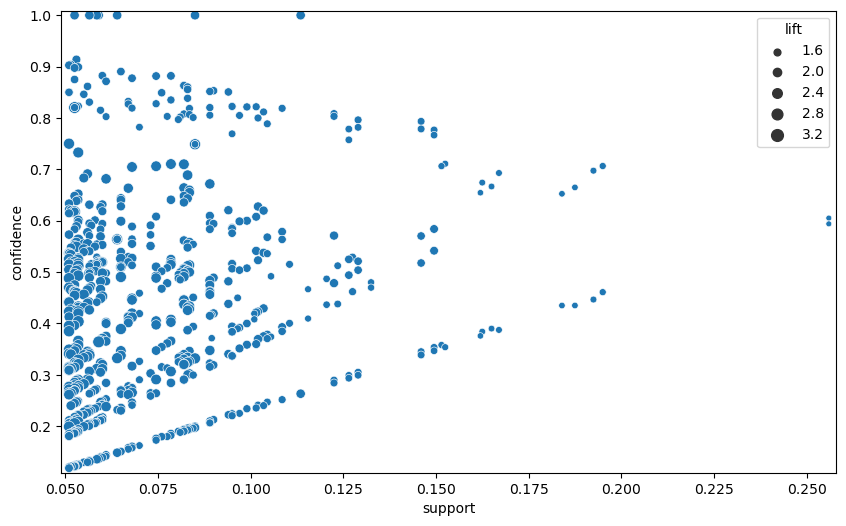

In [10]:
# Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = A_rules)
plt.margins(0.01,0.01)
plt.show()

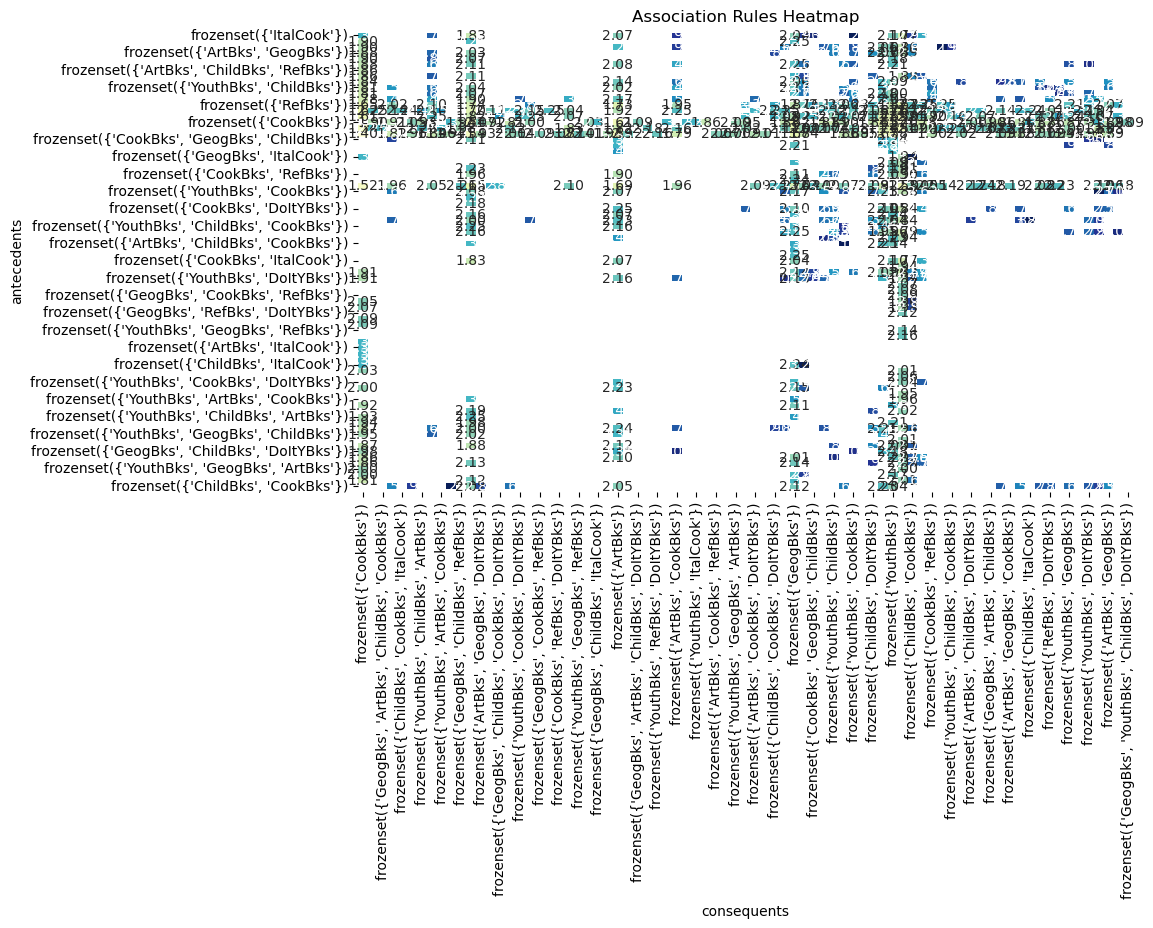

In [11]:
# Heat MAP Visualization
# Create a matrix of association rules with desired metric
A_rules_matrix = A_rules.pivot(index='antecedents', columns='consequents', values='lift')

# Create a heatmap of association rules
plt.figure(figsize=(10,6))

sns.heatmap(A_rules_matrix, cmap='YlGnBu', annot=True, fmt=".2f",cbar=False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)

# Set plot title
plt.title('Association Rules Heatmap')

# Display the heatmap
plt.show()

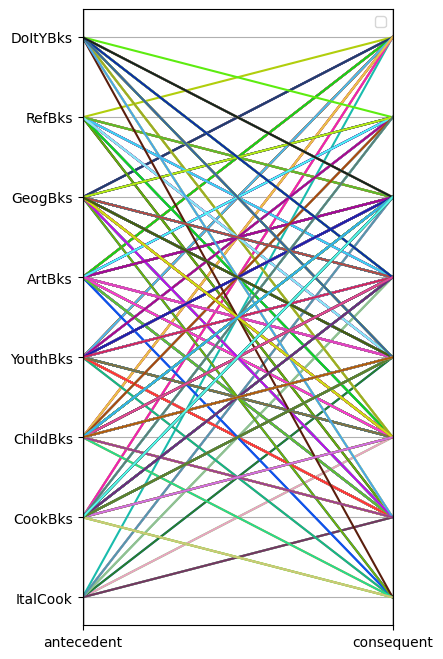

In [12]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]


from pandas.plotting import parallel_coordinates
# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(A_rules)

# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()

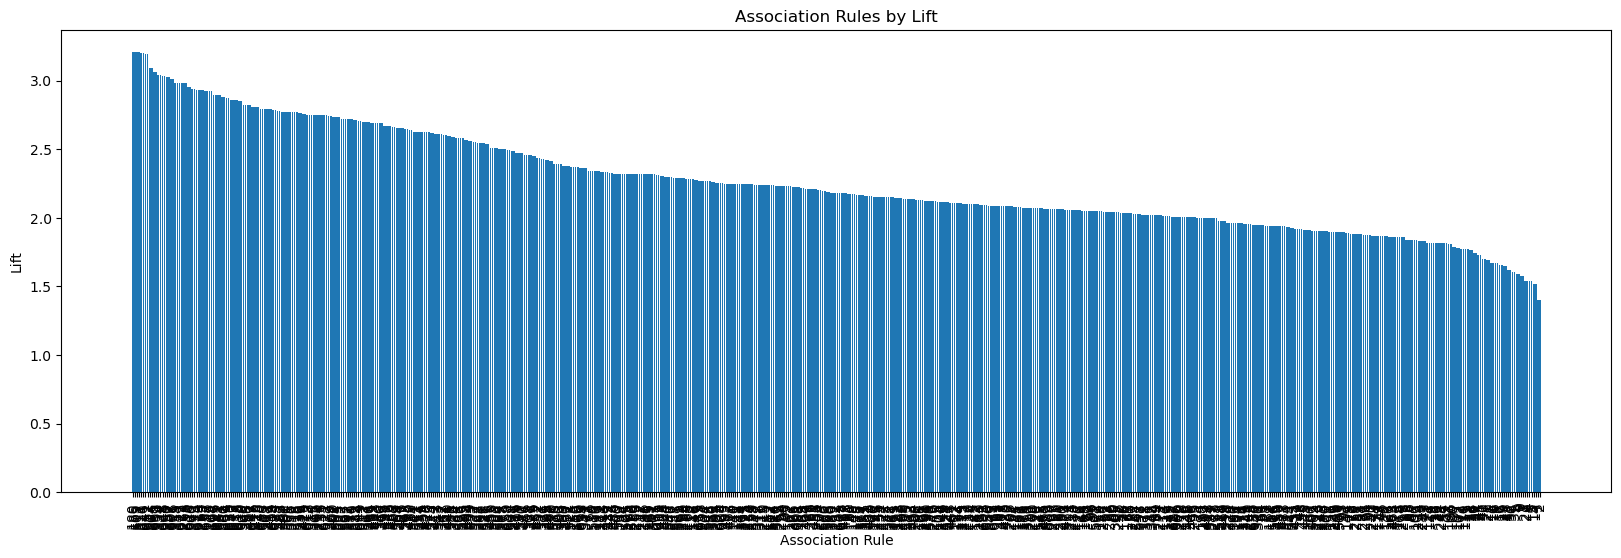

In [13]:
# Bar Chart
# Extract the metric of interest from association rules
metric = "lift"
rules_metric = A_rules[metric]

# Sort rules by the metric in descending order
sorted_rules = A_rules.sort_values(by=metric, ascending=False)

# Create a bar chart
plt.figure(figsize=(20, 6))  # Set the figure size
plt.bar(range(len(sorted_rules)), sorted_rules[metric], tick_label=sorted_rules.index)  # Create the bar chart
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Association Rule')  # Set x-axis label
plt.ylabel(metric.capitalize())  # Set y-axis label
plt.title('Association Rules by {}'.format(metric.capitalize()))  # Set plot title

# Display the bar chart
plt.show()


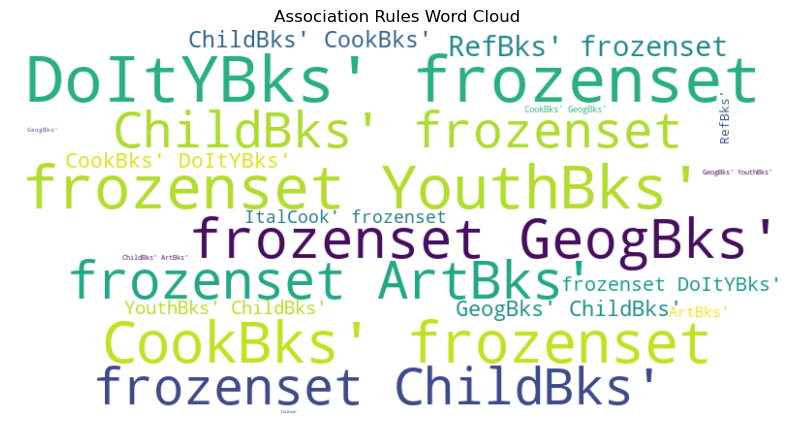

In [14]:
from wordcloud import WordCloud


# Concatenate antecedents and consequents of association rules
words = ' '.join(A_rules['antecedents'].astype(str).tolist() + A_rules['consequents'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(words)

# Create a plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Show the word cloud
plt.axis('off')  # Turn off axis labels
plt.title('Association Rules Word Cloud')  # Set the plot title

# Display the word cloud
plt.show()


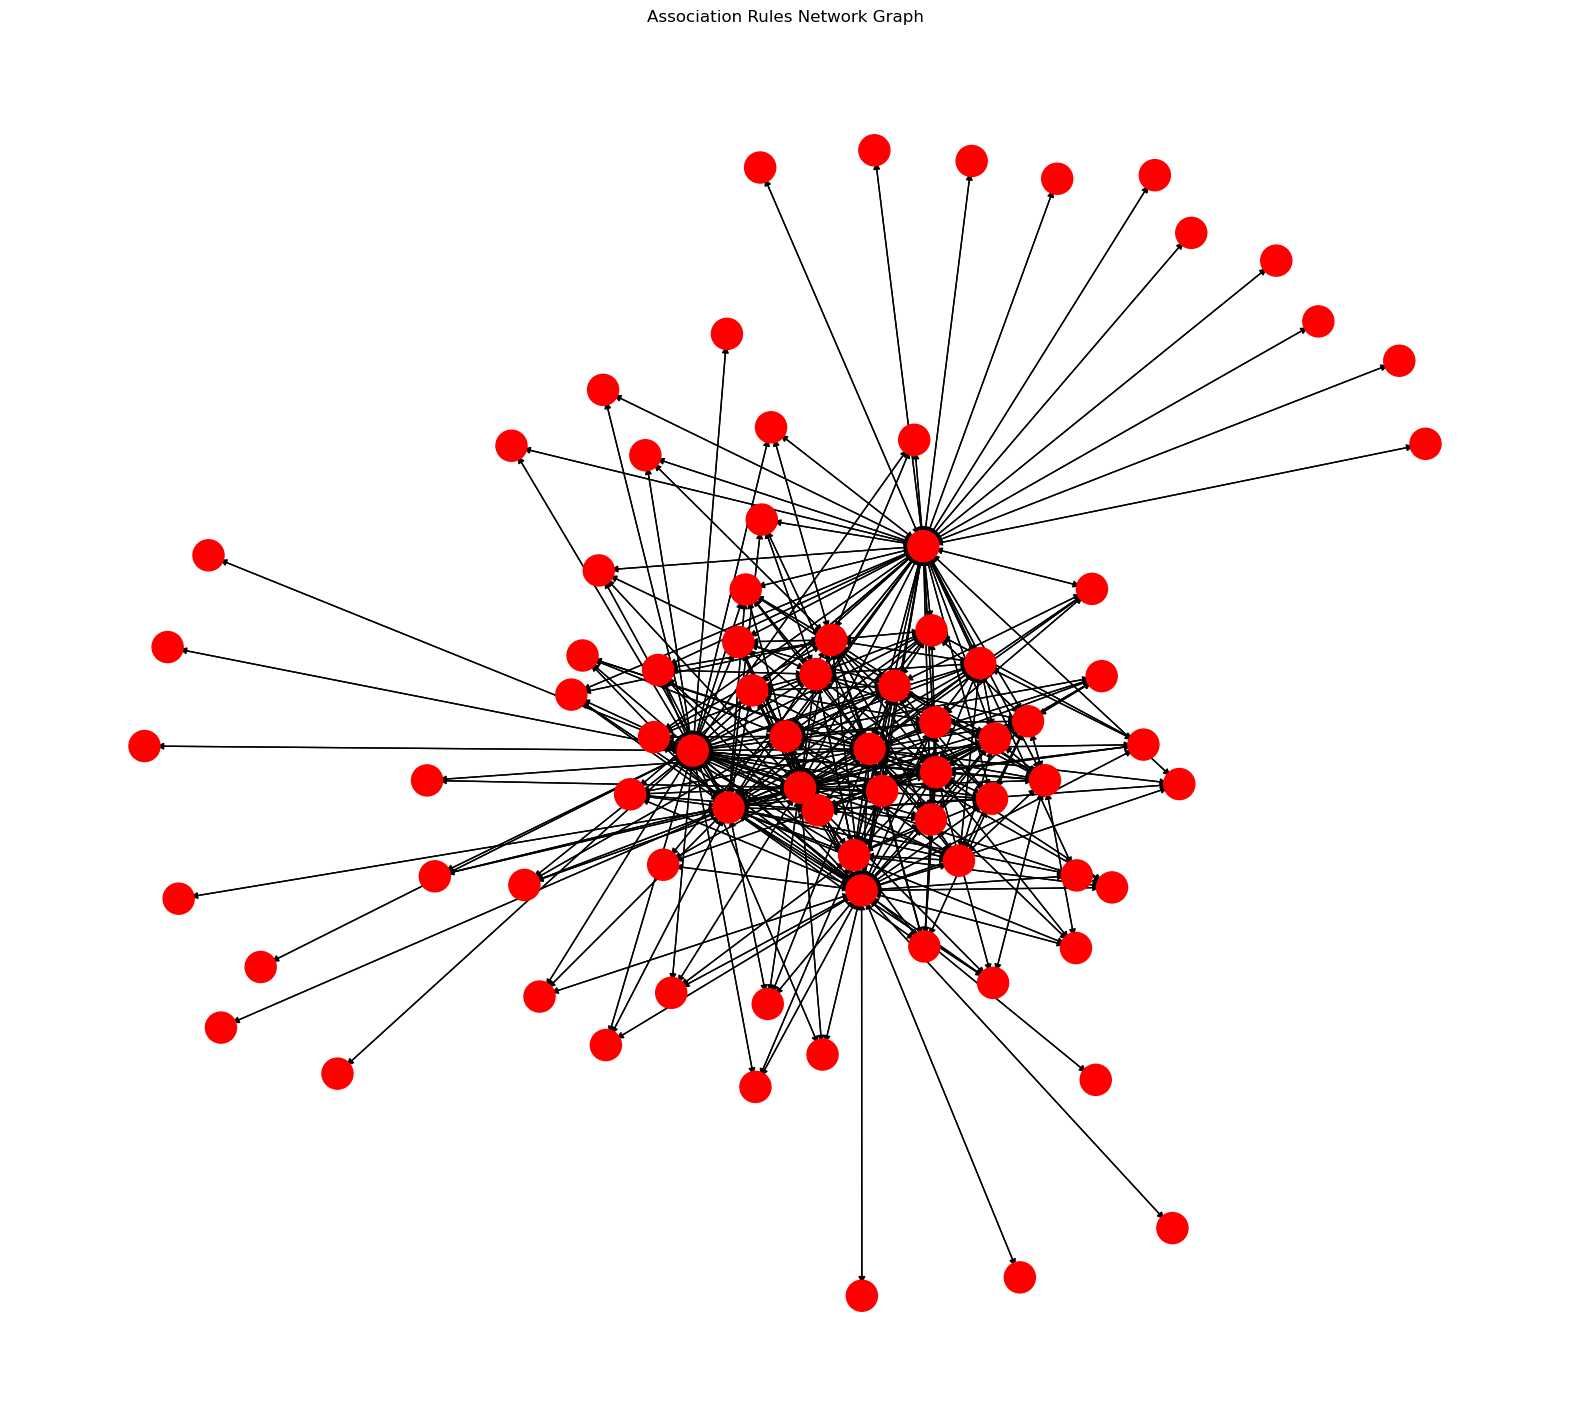

In [16]:

import networkx as nx
# Create a directed graph
G = nx.DiGraph()

# Add nodes for antecedents and consequents of association rules
G.add_nodes_from(A_rules['antecedents'], color='blue', label='antecedent')
G.add_nodes_from(A_rules['consequents'], color='red', label='consequent')

# Add edges between antecedents and consequents based on association rules
for i in range(len(A_rules)):
    G.add_edge(A_rules['antecedents'][i], A_rules['consequents'][i])
plt.figure(figsize=(20,18))
# Set node positions using a spring layout algorithm
pos = nx.spring_layout(G)

# Draw nodes and edges with labels and colors
nx.draw_networkx_nodes(G, pos, node_color=[node[1]['color'] for node in G.nodes(data=True)], node_size=500)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels={node[0]: node[0] for node in G.nodes(data=True) if node[1]['label'] == 'antecedent'})

# Set plot title and display the network graph
plt.title('Association Rules Network Graph')
plt.axis('off')  # Turn off axis labels
plt.show()

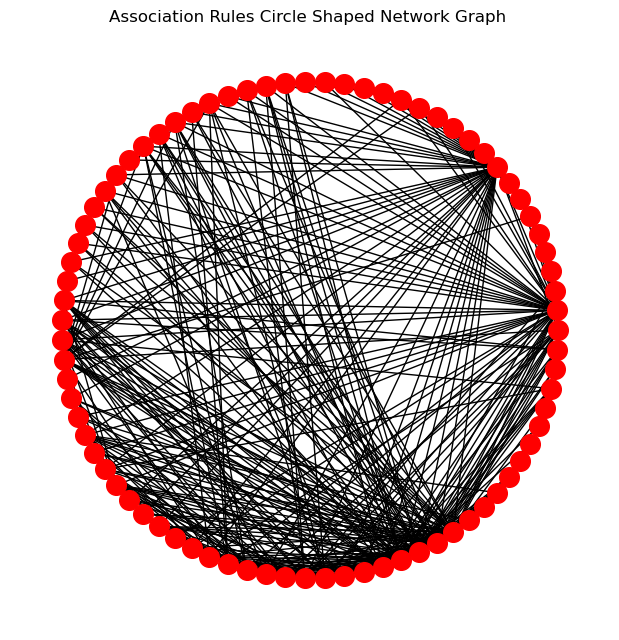

In [17]:
# NetWork Graph

g_rules=nx.from_pandas_edgelist(A_rules,source='antecedents',target='consequents',edge_attr='support')
plt.figure(figsize=(6,6))
nx.draw_circular(g_rules,node_color='red',edge_color='black',with_labels=False,node_size=200)
plt.title('Association Rules Circle Shaped Network Graph ')
plt.show()

### Visualizing Results association Rules with FP_growth Algorithm
     Scatter Plot
     Bar Chart
     Parallel Coordinates Visulazation
     WordCloud
     Network Graph
     

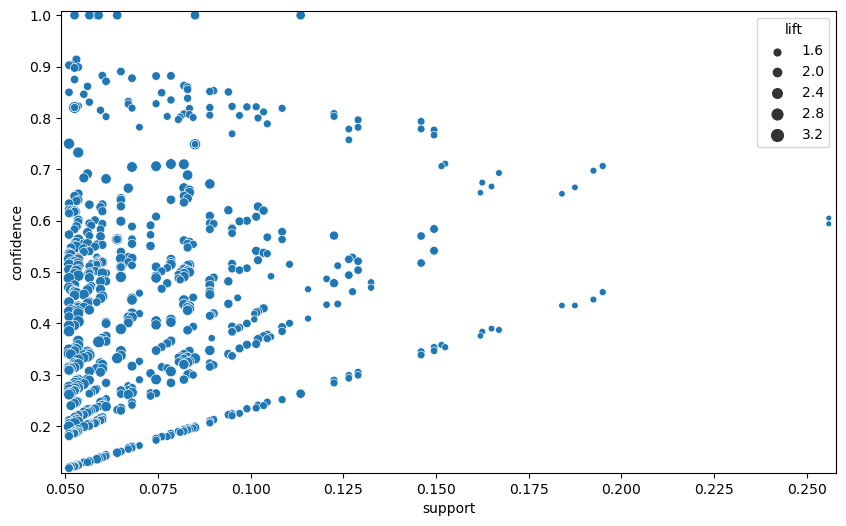

In [18]:
# Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = F_rules)
plt.margins(0.01,0.01)
plt.show()

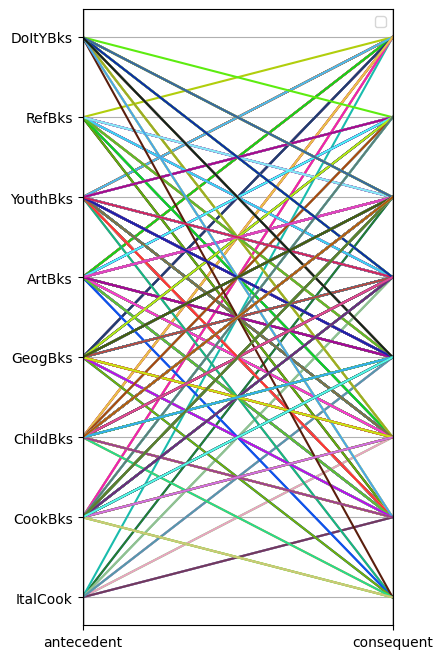

In [19]:
coords = rules_to_coordinates(F_rules)

# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()

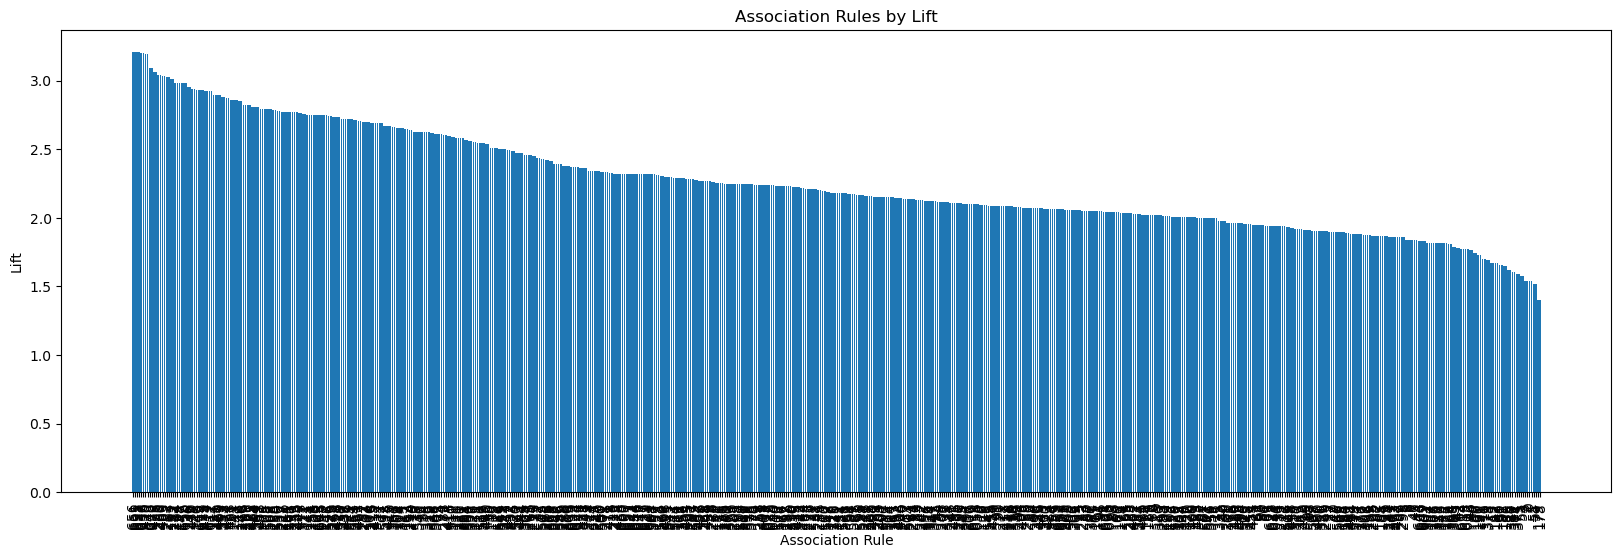

In [20]:
# Bar Chart
# Extract the metric of interest from association rules
metric = "lift"
rules_metric = F_rules[metric]

# Sort rules by the metric in descending order
sorted_rules = F_rules.sort_values(by=metric, ascending=False)

# Create a bar chart
plt.figure(figsize=(20, 6))  # Set the figure size
plt.bar(range(len(sorted_rules)), sorted_rules[metric], tick_label=sorted_rules.index)  # Create the bar chart
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Association Rule')  # Set x-axis label
plt.ylabel(metric.capitalize())  # Set y-axis label
plt.title('Association Rules by {}'.format(metric.capitalize()))  # Set plot title

# Display the bar chart
plt.show()


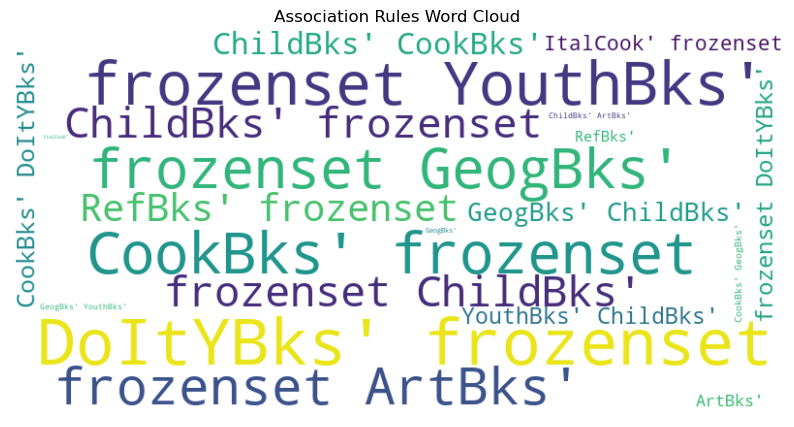

In [21]:



# Concatenate antecedents and consequents of association rules
words = ' '.join(F_rules['antecedents'].astype(str).tolist() + F_rules['consequents'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(words)

# Create a plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Show the word cloud
plt.axis('off')  # Turn off axis labels
plt.title('Association Rules Word Cloud')  # Set the plot title

# Display the word cloud
plt.show()


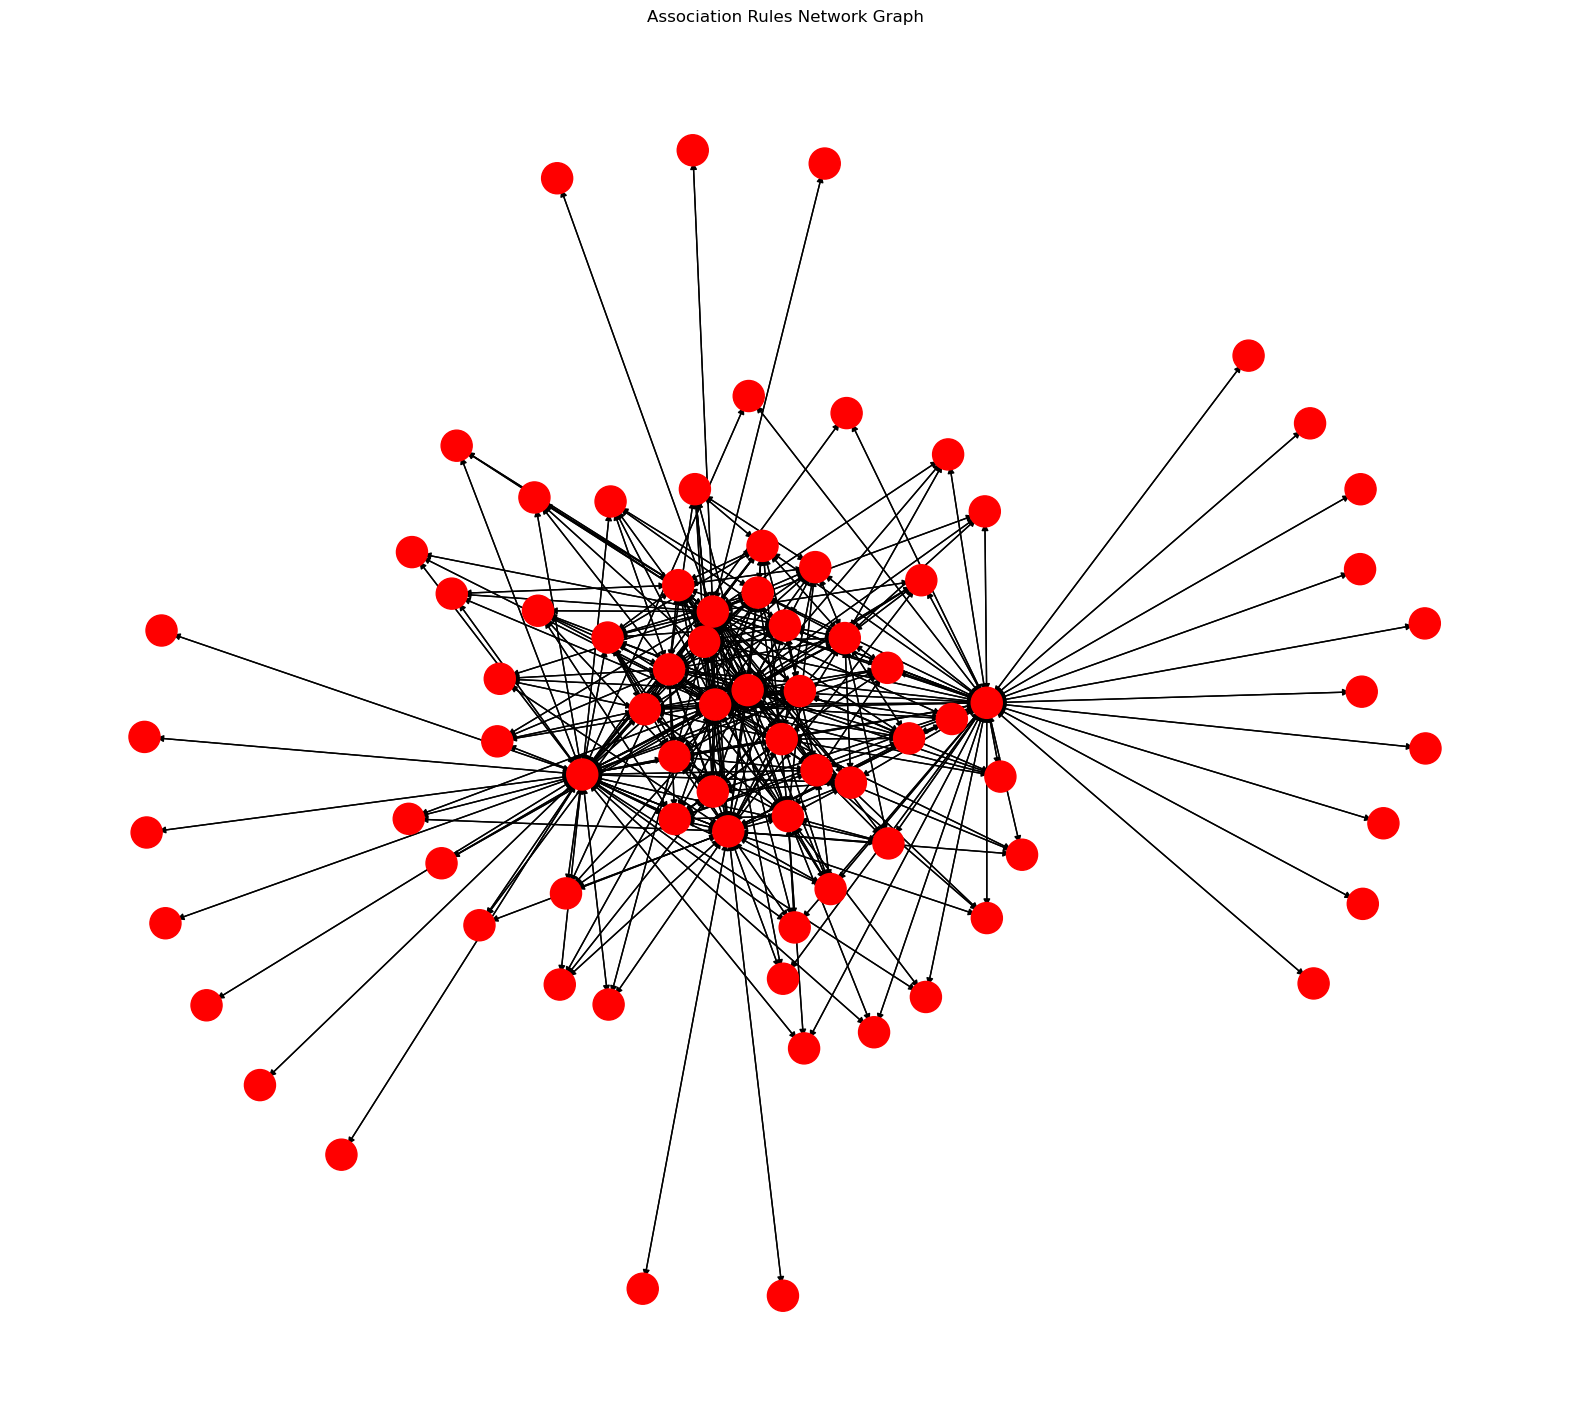

In [22]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes for antecedents and consequents of association rules
G.add_nodes_from(F_rules['antecedents'], color='blue', label='antecedent')
G.add_nodes_from(F_rules['consequents'], color='red', label='consequent')

# Add edges between antecedents and consequents based on association rules
for i in range(len(F_rules)):
    G.add_edge(F_rules['antecedents'][i], F_rules['consequents'][i])
plt.figure(figsize=(20,18))
# Set node positions using a spring layout algorithm
pos = nx.spring_layout(G)

# Draw nodes and edges with labels and colors
nx.draw_networkx_nodes(G, pos, node_color=[node[1]['color'] for node in G.nodes(data=True)], node_size=500)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels={node[0]: node[0] for node in G.nodes(data=True) if node[1]['label'] == 'antecedent'})

# Set plot title and display the network graph
plt.title('Association Rules Network Graph')
plt.axis('off')  # Turn off axis labels
plt.show()

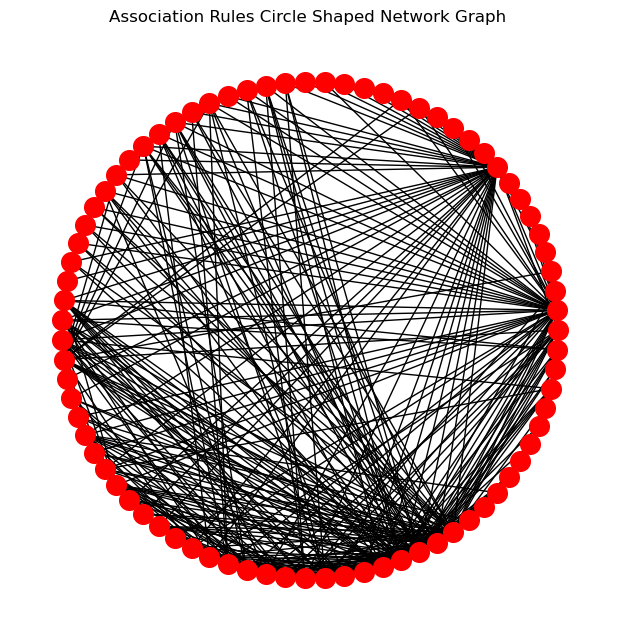

In [23]:
# NetWork Graph
import networkx as nx
g_rules=nx.from_pandas_edgelist(F_rules,source='antecedents',target='consequents',edge_attr='support')
plt.figure(figsize=(6,6))
nx.draw_circular(g_rules,node_color='red',edge_color='black',with_labels=False,node_size=200)
plt.title('Association Rules Circle Shaped Network Graph ')
plt.show()